# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data
The images we're working with are from the Foo101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to use only two classes (🍕 & 🥩) using the image modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure out, what works (or better yet what doesn't work) before scaling up.

In [2]:
# Preprocessed dataset: https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [3]:
import os

# walk through the pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak'.
There are 2 directories and 0 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\test'.
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\test\steak'.
There are 2 directories and 0 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\train'.
There are 0 directories and 750 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'C:/Selbststudium/Udemy/Udemy_TensorFlow_Certificate/pizza_steak\train\steak'.


In [4]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [5]:
# Get classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
    # Created a list of class_names from the subdiretories
print(class_names)

['pizza' 'steak']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    # Show the shape of the image
    print(f"Image shape: {img.shape}") 

    return img

['259449.jpg']
Image shape: (382, 512, 3)


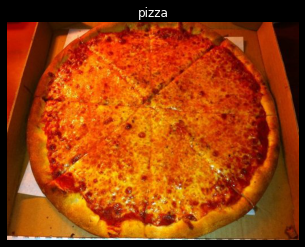

In [7]:
# View random image from the training dataset
img = view_random_image(
    target_dir="pizza_steak/train/", 
    target_class="pizza")

In [8]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(382, 512, 3), dtype=uint8, numpy=
array([[[ 67,   1,   2],
        [ 69,   1,   2],
        [ 69,   1,   2],
        ...,
        [ 16,   2,   0],
        [ 16,   2,   0],
        [ 16,   2,   0]],

       [[ 77,   1,   1],
        [ 78,   2,   2],
        [ 78,   2,   2],
        ...,
        [ 17,   3,   0],
        [ 17,   3,   0],
        [ 17,   3,   0]],

       [[ 93,   3,   2],
        [ 93,   3,   2],
        [ 93,   3,   2],
        ...,
        [ 18,   3,   0],
        [ 19,   4,   1],
        [ 19,   4,   1]],

       ...,

       [[230, 188, 164],
        [230, 188, 164],
        [233, 188, 165],
        ...,
        [ 73,  20,   6],
        [ 93,  34,  18],
        [100,  37,  20]],

       [[225, 189, 167],
        [225, 187, 166],
        [228, 187, 169],
        ...,
        [ 77,  20,   0],
        [ 95,  30,   8],
        [ 99,  28,   6]],

       [[220, 187, 168],
        [223, 187, 171],
        [226, 189, 173],
        ...,
        [115,  54,  2

In [9]:
# View the image shape
img.shape # returns width, height, colour channels

(382, 512, 3)

🔑 **Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (sind 255 is the maximum pixel value.)

In [10]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.2627451 , 0.00392157, 0.00784314],
        [0.27058824, 0.00392157, 0.00784314],
        [0.27058824, 0.00392157, 0.00784314],
        ...,
        [0.0627451 , 0.00784314, 0.        ],
        [0.0627451 , 0.00784314, 0.        ],
        [0.0627451 , 0.00784314, 0.        ]],

       [[0.30196078, 0.00392157, 0.00392157],
        [0.30588235, 0.00784314, 0.00784314],
        [0.30588235, 0.00784314, 0.00784314],
        ...,
        [0.06666667, 0.01176471, 0.        ],
        [0.06666667, 0.01176471, 0.        ],
        [0.06666667, 0.01176471, 0.        ]],

       [[0.36470588, 0.01176471, 0.00784314],
        [0.36470588, 0.01176471, 0.00784314],
        [0.36470588, 0.01176471, 0.00784314],
        ...,
        [0.07058824, 0.01176471, 0.        ],
        [0.0745098 , 0.01568627, 0.00392157],
        [0.0745098 , 0.01568627, 0.00392157]],

       ...,

       [[0.90196078, 0.7372549 , 0.64313725],
        [0.90196078, 0.7372549 , 0.64313725],
        [0.91372549, 0

## AN end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called as scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode="binary",
    seed=42)

valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="binary",
    seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size=3,
        activation="relu",
        input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), # This layer actually is the same as the one above
    tf.keras.layers.MaxPool2D(
        pool_size=2,
        padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# Fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 363ms/step - loss: 0.5812 - accuracy: 0.6700 - val_loss: 0.3758 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 7s 151ms/step - loss: 0.4179 - accuracy: 0.8133 - val_loss: 0.3171 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3828 - accuracy: 0.8267 - val_loss: 0.3233 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 7s 159ms/step - loss: 0.3721 - accuracy: 0.8420 - val_loss: 0.3130 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 7s 150ms/step - loss: 0.3147 - accuracy: 0.8700 - val_loss: 0.2869 - val_accuracy: 0.8800


🔑 **Note:** If the above cell is taking longer than ~10s per Epoch, make sure to use a GPU.

In [12]:
# Get a model summary 
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

🛠️ **Practice/Exercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/ 

## Using the same model as before

Let's replicate the model we've build in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.43089&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 7s 143ms/step - loss: 1.1170 - accuracy: 0.4953 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 141ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [14]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... Let's try to improve it.

In [15]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 7s 139ms/step - loss: 2.4947 - accuracy: 0.6240 - val_loss: 0.6915 - val_accuracy: 0.7040
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 1.0007 - accuracy: 0.6980 - val_loss: 0.8728 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.5742 - accuracy: 0.7573 - val_loss: 0.5248 - val_accuracy: 0.7480
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.7259 - accuracy: 0.7167 - val_loss: 0.5295 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.5133 - accuracy: 0.7687 - val_loss: 0.7442 - val_accuracy: 0.6940


In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles od model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out an learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Binary Classification: Let's break it down

1. Become one with the data (viszualize, viszualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Created a model (start with a baseline) (e.g. 101 food paper)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['752203.jpg']
Image shape: (512, 512, 3)
['1110966.jpg']
Image shape: (512, 512, 3)


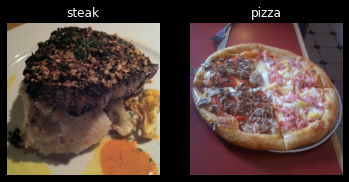

In [24]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than looking at 10 thousands of images at one time, a model might only look at e.g. 32 images at one time to find patterns.
It does this for a couple of reasons:
1. 10 thousands (or more) images might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10 thousands images in one hit, could result in the model not beaing able to learn very well.

Why 32?

Because 32 is good for your health...: https://twitter.com/ylecun/status/989610208497360896?s=20

In [27]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)
# ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [29]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    class_mode="binary",
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# Get a sample of a trin data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [31]:
# How many batches are there?
len(train_data)

47

In [32]:
1500/32

46.875

In [33]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [35]:
images[7], images[7].shape

(array([[[0.30588236, 0.17254902, 0.227451  ],
         [0.34901962, 0.21960786, 0.25490198],
         [0.4039216 , 0.2784314 , 0.2901961 ],
         ...,
         [0.16470589, 0.02745098, 0.1137255 ],
         [0.16862746, 0.01960784, 0.10980393],
         [0.15686275, 0.00784314, 0.10588236]],
 
        [[0.28235295, 0.14901961, 0.20392159],
         [0.34117648, 0.21176472, 0.24705884],
         [0.42352945, 0.29803923, 0.30980393],
         ...,
         [0.17254902, 0.02352941, 0.1137255 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16078432, 0.01176471, 0.10980393]],
 
        [[0.2627451 , 0.13725491, 0.19607845],
         [0.3254902 , 0.20000002, 0.24313727],
         [0.41960788, 0.29803923, 0.31764707],
         ...,
         [0.19215688, 0.04313726, 0.1254902 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16862746, 0.03137255, 0.1254902 ]],
 
        ...,
 
        [[0.62352943, 0.5803922 , 0.5568628 ],
         [0.6039216 , 0.56078434, 0.53725

In [36]:
# View the fir batch labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result, that you setup when beginning a machine learning experiment, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [37]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [39]:
# Create the model (this will be our baseline, a three layer convolutional neural network)
model_4 = Sequential([
    Conv2D(
        filters=10, # Filters is the number of sliding windows going across an input (higher = more complex model)
        kernel_size=3, # The size of the sliding window going across an input
        strides=1, # Default = valid; The size of the step the sliding window takes across an input
        padding="valid", # Default = valid; if "same", output shape is same as input shape, if "valid", output shape gets compressed
        activation="relu",
        input_shape=(224, 224, 3) # input layer (specify input shape)
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification, so only one outpur neuron)
])

> 🛠️ **Practive:** Understand what's going on in a Conv2D layer by going through the CNN explainer website https://poloclub.github.io/cnn-explainer/